load and eda 


   StudyHours  Attendance  SleepHours  PreviousMarks  InternetUsage  Pass
0    1.150546   90.818119    9.975900      82.607916       2.841631     0
1    6.090665   89.164531    7.818444      79.970935       2.066604     0
2    1.333910   74.429208    8.990440      59.362602       0.055533     0
3    2.405896   81.600537    5.691010      77.837574       3.950805     0
4    3.271391   65.703324    4.647105      63.340440       3.328521     0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StudyHours     1500 non-null   float64
 1   Attendance     1500 non-null   float64
 2   SleepHours     1500 non-null   float64
 3   PreviousMarks  1500 non-null   float64
 4   InternetUsage  1500 non-null   float64
 5   Pass           1500 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 70.4 KB
None
        StudyHours   Attendance   SleepHou

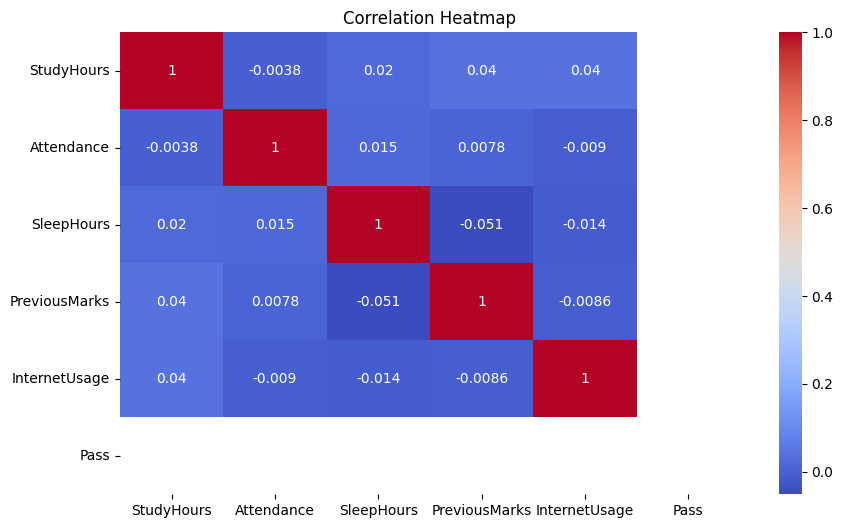

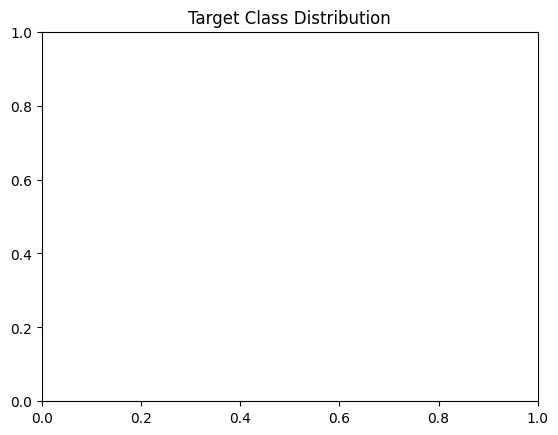

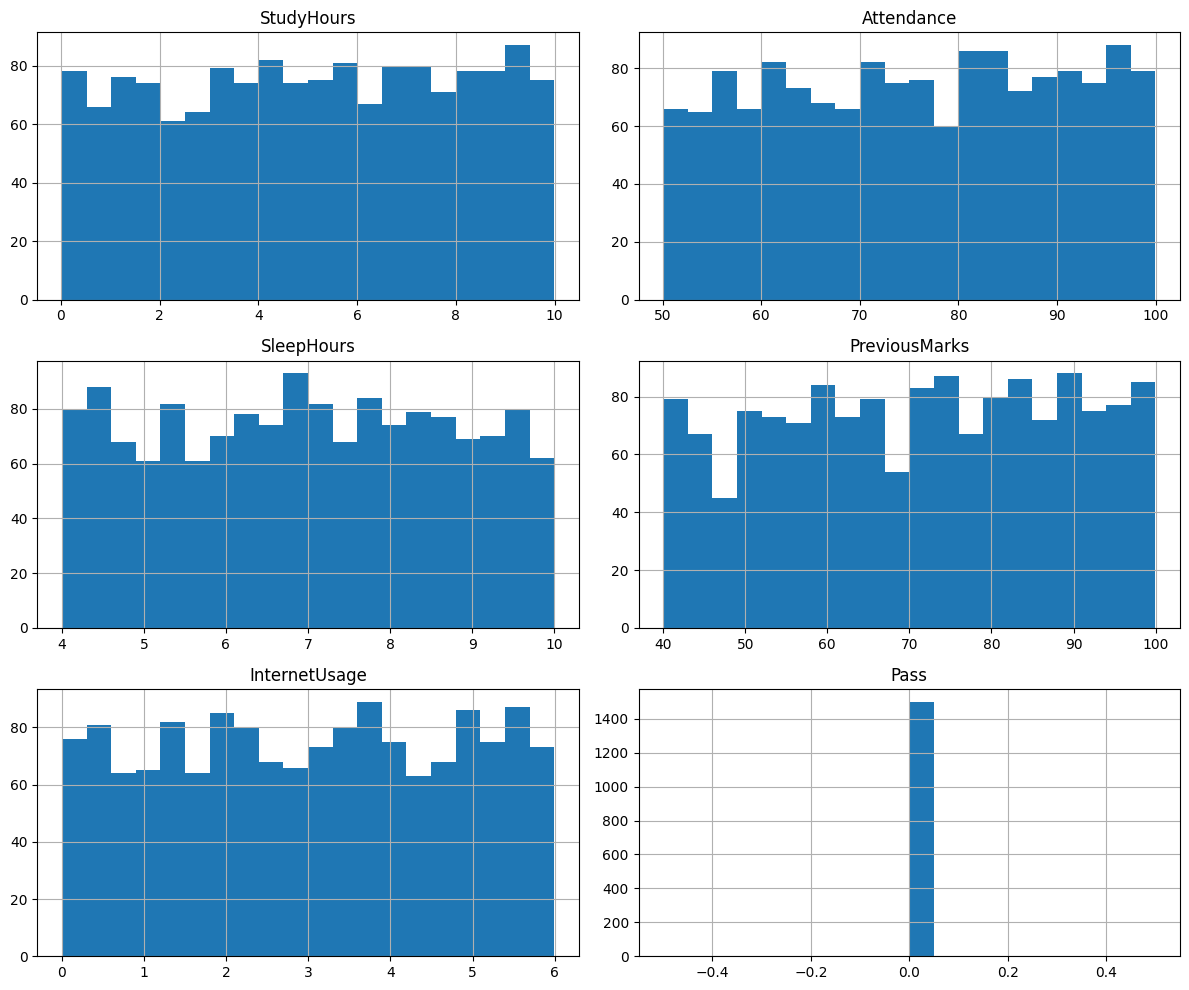

In [8]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("medium_classification_student_performance_1500.csv")

print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# CORRELATION HEATMAP
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# TARGET DISTRIBUTION

plt.title("Target Class Distribution")
plt.show()

# HISTOGRAMS
df.hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()



TRAIN TEST SPLIT 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop("Pass", axis=1)
y = df["Pass"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


ANN 

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(32, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # classification output

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32,
                    validation_split=0.1)

loss, acc = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", acc)


c:\Users\HP\Desktop\deep learning\myenv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7843 - loss: 0.5278 - val_accuracy: 1.0000 - val_loss: 0.3472
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.2372 - val_accuracy: 1.0000 - val_loss: 0.1623
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.1095 - val_accuracy: 1.0000 - val_loss: 0.0773
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0505 - val_accuracy: 1.0000 - val_loss: 0.0370
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0249 - val_accuracy: 1.0000 - val_loss: 0.0204
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0144 - val_accuracy: 1.0000 - val_loss: 0.0127
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0094 - val_accuracy: 1.0000 - val_loss: 0.0088
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0066 - val_accuracy: 1.0000 - val_loss

CURVE, METRICES 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Accuracy: 1.0


c:\Users\HP\Desktop\deep learning\myenv\Lib\site-packages\sklearn\metrics\_classification.py:620: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


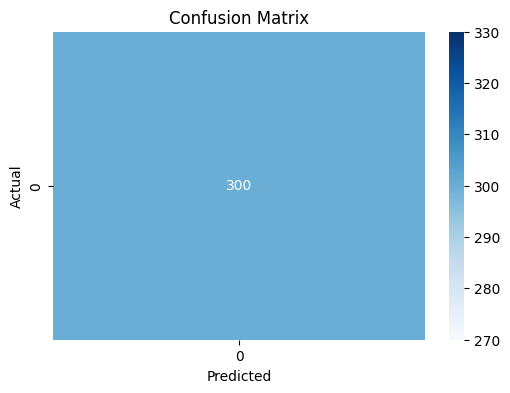

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



c:\Users\HP\Desktop\deep learning\myenv\Lib\site-packages\sklearn\metrics\_ranking.py:1303: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


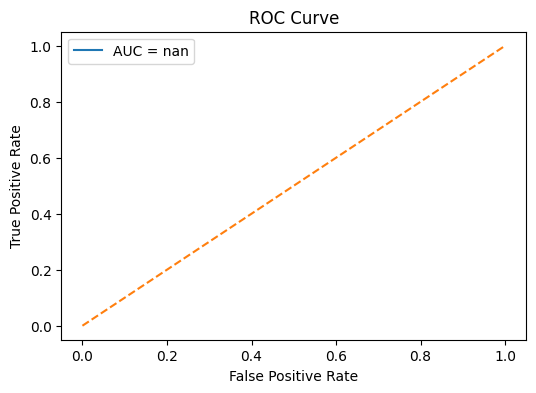

AUC Score: nan


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Predictions
y_pred_prob = model.predict(X_test_scaled)         # predicted probabilities
y_pred = (y_pred_prob > 0.5).astype("int32")       # convert to 0/1

# 2. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 4. Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# 5. ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="AUC = %.3f" % roc_auc)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("AUC Score:", roc_auc)
